In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
dataset=pd.read_csv('student-mat.csv')
dataset
#Analyze student performance in Math and determine factors affecting final grades.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
dataset = dataset.drop(columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'nursery', 'higher', 'internet', 'romantic'])

In [4]:
dataset.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
"""This dataset contains information about students' academic performance and personal background. 
It includes details like school name, gender (sex), age, and whether they live in an urban or rural area (address). 
It shows family size (famsize), parents’ marital status (Pstatus), and education level of the mother and father (Medu, Fedu).
The jobs of both parents (Mjob, Fjob) and the reason for choosing the school are also listed. 
The guardian of the student is noted, along with how long they take to travel to school (traveltime), how much they study (studytime),
and how many past class failures they've had. It includes whether they receive extra school support (schoolsup), family support (famsup),
or paid tutoring (paid). It also records involvement in activities, nursery attendance, desire for higher education, internet access, and if
they are in a romantic relationship. Additional columns reflect their family relationships (famrel), free time, social activity (goout), alcohol
consumption on weekdays (Dalc) and weekends (Walc), overall health, number of absences, and finally, their grades for 3 periods (G1, G2, G3), 
where G3 is the final grade and often used as the prediction target."""

"This dataset contains information about students' academic performance and personal background. \nIt includes details like school name, gender (sex), age, and whether they live in an urban or rural area (address). \nIt shows family size (famsize), parents’ marital status (Pstatus), and education level of the mother and father (Medu, Fedu).\nThe jobs of both parents (Mjob, Fjob) and the reason for choosing the school are also listed. \nThe guardian of the student is noted, along with how long they take to travel to school (traveltime), how much they study (studytime),\nand how many past class failures they've had. It includes whether they receive extra school support (schoolsup), family support (famsup),\nor paid tutoring (paid). It also records involvement in activities, nursery attendance, desire for higher education, internet access, and if\nthey are in a romantic relationship. Additional columns reflect their family relationships (famrel), free time, social activity (goout), alcoho

In [6]:
dataset.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,yes,no,no,no,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,no,yes,no,no,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,yes,no,yes,no,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,no,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,no,yes,yes,no,4,3,2,1,2,5,4,6,10,10


In [7]:
dataset.isnull().sum()

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
le=LabelEncoder()
for col in dataset.columns:
    dataset[col]=le.fit_transform(dataset[col])
dataset


,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,3,4,4,1,1,0,1,0,0,0,3,2,3,0,0,2,6,2,3,3
1,2,1,1,0,1,0,0,1,0,0,4,2,2,0,0,2,4,2,2,3
2,0,1,1,0,1,3,1,0,1,0,3,2,1,1,2,2,10,4,5,7
3,0,4,2,0,2,0,0,1,1,1,2,1,1,0,0,4,2,12,11,12
4,1,3,3,0,1,0,0,1,1,0,3,2,1,0,1,4,4,3,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5,2,2,0,1,2,0,1,1,0,4,4,3,3,4,3,11,6,6,6
391,2,3,1,1,0,0,0,0,0,0,1,3,4,2,3,1,3,11,13,13
392,6,1,1,0,0,3,0,0,0,0,4,4,2,2,2,2,3,7,5,4
393,3,3,2,2,0,0,0,0,0,0,3,3,0,2,3,4,0,8,9,7


In [9]:
cols_to_drop = ['Medu', 'Fedu', 'freetime', 'famrel', 'activities', 'goout','age']

for col in cols_to_drop:
    if col in dataset.columns:
        dataset = dataset.drop(col, axis=1)
dataset

,traveltime,studytime,failures,schoolsup,famsup,paid,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,0,1,0,0,0,0,2,6,2,3,3
1,0,1,0,0,1,0,0,0,2,4,2,2,3
2,0,1,3,1,0,1,1,2,2,10,4,5,7
3,0,2,0,0,1,1,0,0,4,2,12,11,12
4,0,1,0,0,1,1,0,1,4,4,3,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,2,0,1,1,3,4,3,11,6,6,6
391,1,0,0,0,0,0,2,3,1,3,11,13,13
392,0,0,3,0,0,0,2,2,2,3,7,5,4
393,2,0,0,0,0,0,2,3,4,0,8,9,7


In [10]:
x=dataset.drop(['G3'],axis=1)
y=dataset['G3']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [13]:
for col in dataset.columns:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]

print(dataset.shape)

(227, 13)


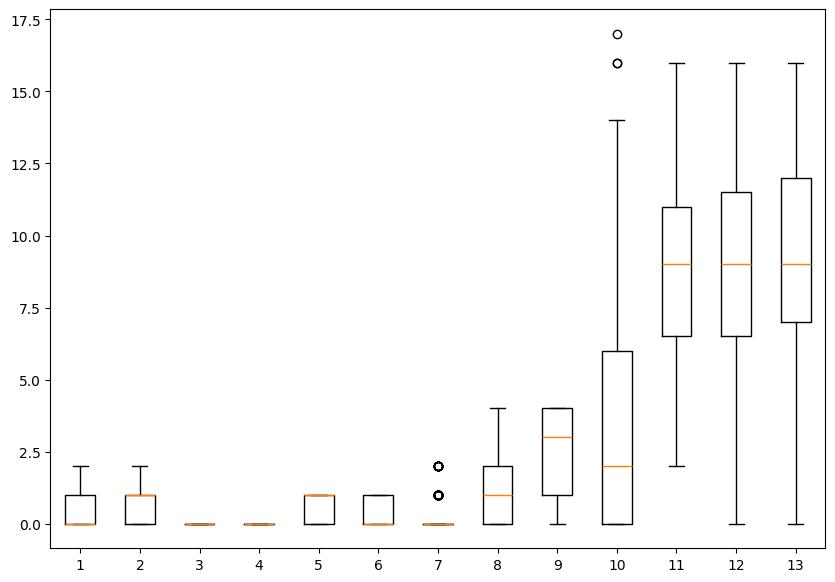

In [14]:
fig = plt.figure(figsize=(10, 7))
plt.boxplot(dataset)

# Show plot
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [20]:
x_train.shape

(316, 12)

In [21]:
y_train.shape

(316,)

In [22]:
x_test.shape

(79, 12)

In [23]:
y_test.shape

(79,)

In [25]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')        # Create the model
svm.fit(x_train, y_train)         # Train it
y_pred = svm.predict(x_test)      # Predict on test data


In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Classification report:",classification_report(y_test,y_pred))
print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Accuracy score: 0.4177215189873418
Classification report:               precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           2       0.00      0.00      0.00         4
           3       0.67      0.33      0.44         6
           4       0.00      0.00      0.00         1
           5       0.29      0.33      0.31         6
           6       0.50      0.60      0.55         5
           7       0.50      0.64      0.56        11
           8       0.33      0.20      0.25         5
           9       0.50      0.40      0.44         5
          10       0.75      0.60      0.67         5
          11       0.45      0.83      0.59         6
          12       0.50      0.30      0.38        10
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         3
          15       0.33      1.00      0.50         1
          16       0.00      0.00      0.00         2

    accuracy          

C:\Users\tejas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tejas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tejas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

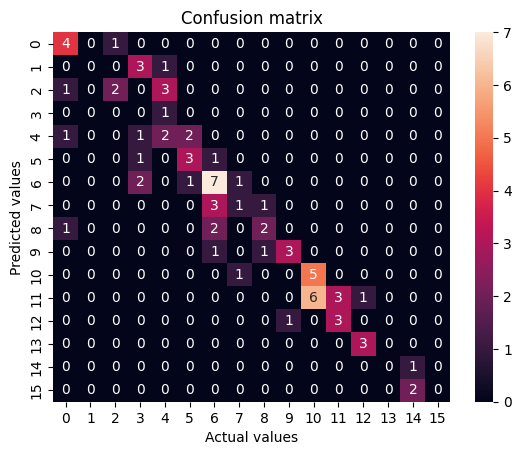

In [27]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title("Confusion matrix")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [28]:
import pickle
with open('student_svm.pkl','wb') as file:
    pickle.dump(svm,file)